# Introduction to Agent Based Modeling

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import numpy as np
%matplotlib inline

## Single Random Walk

Making random walking agents

In [2]:
class Agent:
    """random walking angent"""
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.search_neighbour()
        self.xtjct = [x]
        self.ytjct = [y]
    
    def search_neighbour(self) -> set:
        """Neumann neighborhood"""
        self.neighbor = {(i, j) for i in [self.x - 1, self.x, self.x + 1] for j in [self.y - 1, self.y, self.y + 1]}
    
    def walk(self):
        self.x = self.x + random.choice([-1, 0, 1])
        self.y = self.y + random.choice([-1, 0, 1])
    
    def next_move(self):
        self.walk()
        self.search_neighbour()
        self.xtjct.append(self.x)
        self.ytjct.append(self.y)

Making a instance as "a"

In [3]:
a = Agent(0, 0)

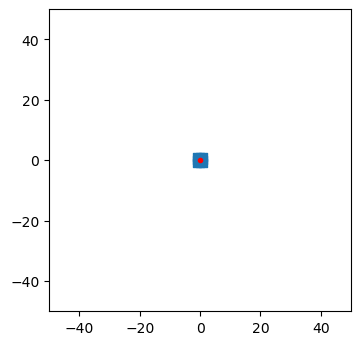

In [4]:
fig = plt.figure(dpi=100, figsize=(4, 4))
plt.plot(a.x, a.y, marker= ".", color = "red")
temp = np.array(list(a.neighbor))
plt.scatter(temp[:,0], temp[:,1], marker= "s")
plt.axis([-50, 50, -50, 50]) # x軸、y軸のMin, Maxを指定
plt.gca().set_aspect('equal')
plt.show()

4 2


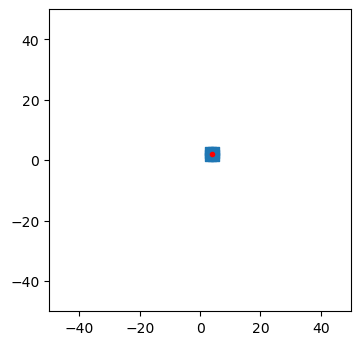

In [5]:
for i in range(100):
    a.next_move()

print(a.x, a.y)
fig = plt.figure(dpi=100, figsize=(4, 4))
plt.plot(a.x, a.y, marker= ".", color = "red")
temp = np.array(list(a.neighbor))
plt.scatter(temp[:,0], temp[:,1], marker= "s")
plt.axis([-50, 50, -50, 50]) # x軸、y軸のMin, Maxを指定
plt.gca().set_aspect('equal')
plt.show()

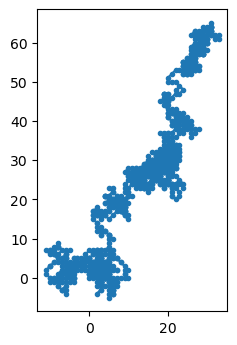

In [6]:
for i in range(1000):
    a.next_move()

fig = plt.figure(dpi=100, figsize=(4, 4))
plt.plot(a.xtjct, a.ytjct, marker=".")
plt.gca().set_aspect('equal')
plt.show()

## Agents who avoid other unmoved agents

Decent agents avoid other's personal space

In [17]:
class Agent2:
    """random walking angent
    who avoids other's personal space"""
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.search_neighbour()
        self.xtjct = [x]
        self.ytjct = [y]

    def search_neighbour(self) -> set:
        """Neumann neighborhood"""
        self.neighbor = {(i, j) for i in [self.x - 1, self.x, self.x + 1] for j in [self.y - 1, self.y, self.y + 1]}

    def search_other_neighbor(self, other_agents):
        """search other agents' neighbors"""
        temp = set()
        for other in other_agents:
            temp = temp.union(other.neighbor)
        self.other_neighbor = temp

    def walk(self):
        """walking with avoiding other agents"""
        temp_x = self.x + random.choice([-1, 0, 1])
        temp_y = self.y + random.choice([-1, 0, 1])
        if (temp_x, temp_y) not in self.other_neighbor:
            self.x, self.y = temp_x, temp_y

    def next_move(self, other_agents):
        self.search_other_neighbor(other_agents)
        self.walk()
        self.search_neighbour()
        self.xtjct.append(self.x)
        self.ytjct.append(self.y)

In [18]:
# creating agents
agents = [Agent2(random.randrange(-10, 10), random.randrange(-10, 10)) for i in range(10)]

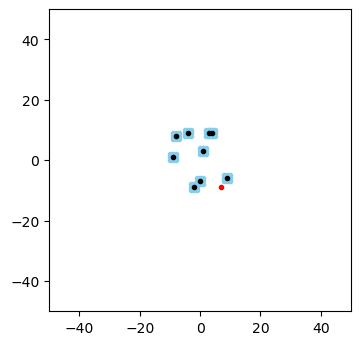

In [20]:
agents[0].next_move(agents[0:0] + agents[(0 + 1):len(agents)])

fig = plt.figure(dpi=100, figsize=(4, 4))
plt.plot(agents[0].x, agents[0].y, marker= ".", color = "red")
for i in range(1,len(agents)):
    plt.plot(agents[i].x, agents[i].y, marker= ".", color = "black")
    temp = np.array(list(agents[i].neighbor))
    plt.scatter(temp[:,0], temp[:,1], marker= ".", color = "skyblue")
plt.axis([-50, 50, -50, 50]) # x軸、y軸のMin, Maxを指定
plt.gca().set_aspect('equal')
plt.show()

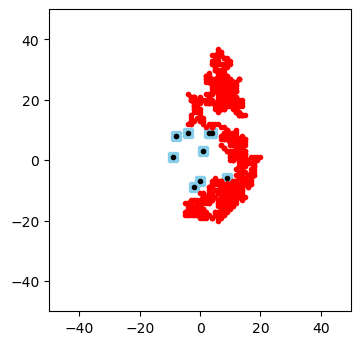

In [21]:
for t in range(1000):
    agents[0].next_move(agents[0:0] + agents[(0 + 1):len(agents)])

fig = plt.figure(dpi=100, figsize=(4, 4))
plt.plot(agents[0].xtjct, agents[0].ytjct, marker=".", color="red")
for i in range(1,len(agents)):
    plt.plot(agents[i].x, agents[i].y, marker= ".", color = "black")
    temp = np.array(list(agents[i].neighbor))
    plt.scatter(temp[:,0], temp[:,1], marker= ".", color = "skyblue")
plt.axis([-50, 50, -50, 50]) # x軸、y軸のMin, Maxを指定
plt.gca().set_aspect('equal')
plt.show()

## Agents who avoid each other agents

In [22]:
# creating agents
agents = [Agent2(random.randrange(-10, 10), random.randrange(-10, 10)) for i in range(10)]

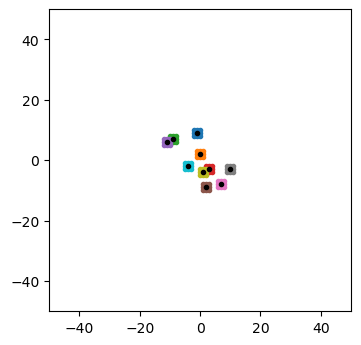

In [36]:
for i in range(len(agents)):
    agents[i].next_move(agents[0:i] + agents[(i + 1):len(agents)])

fig = plt.figure(dpi=100, figsize=(4, 4))
for i in range(0,len(agents)):
    plt.plot(agents[i].x, agents[i].y, marker= ".", color="black")
    temp = np.array(list(agents[i].neighbor))
    plt.scatter(temp[:,0], temp[:,1], marker= ".")
plt.axis([-50, 50, -50, 50]) # x軸、y軸のMin, Maxを指定
plt.gca().set_aspect('equal')
plt.show()

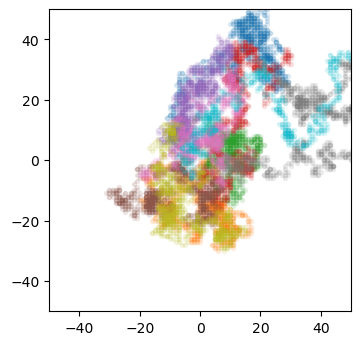

In [37]:
for t in range(1000):
    for i in range(len(agents)):
        agents[i].next_move(agents[0:i] + agents[(i + 1):len(agents)])

fig = plt.figure(dpi=100, figsize=(4, 4))
for i in range(0,len(agents)):
    plt.plot(agents[i].xtjct, agents[i].ytjct, marker=".", alpha=0.1)
plt.axis([-50, 50, -50, 50]) # x軸、y軸のMin, Maxを指定
plt.gca().set_aspect('equal')
plt.show()

## Agent animation (not working in vscode)

<IPython.core.display.Javascript object>


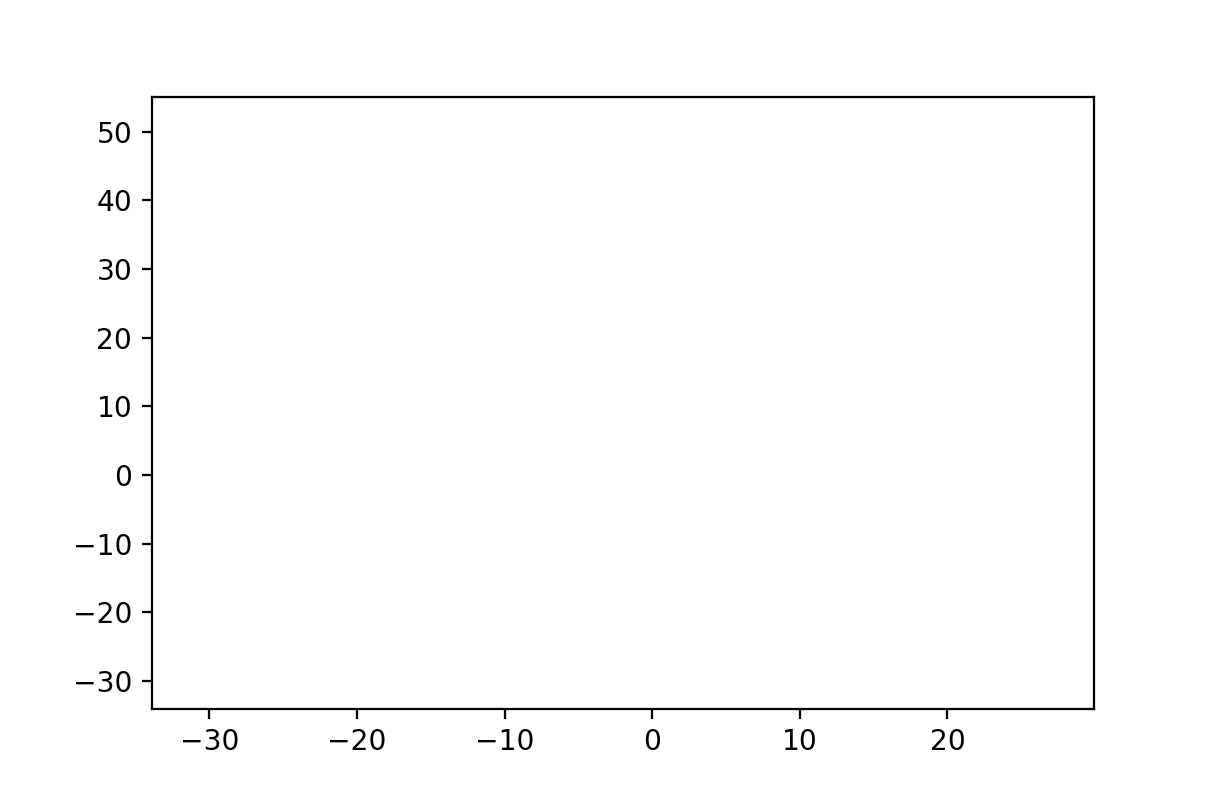

In [14]:
%matplotlib nbagg

# creating agents
agents = [Agent2(random.randrange(-10, 10), random.randrange(-10, 10)) for i in range(10)]

fig = plt.figure()
ims = []

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(agents))]       

for t in range(100):
    # plt.cla()
    for i in range(len(agents)):
        agents[i].next_move(agents[0:i] + agents[(i + 1):len(agents)])

    x = [agents[i].x for i in range(len(agents))]
    y = [agents[i].y for i in range(len(agents))]
    im = plt.scatter(x, y, marker= ".", c = colorst)# c=list(range(len(agents)))
    ims.append([im]) 

ani = animation.ArtistAnimation(fig, ims)
plt.show()

## BOTSU

In [ ]:
# # Roulette moving

# import math

# class Agent:
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y
#         self.xtjct = [x]
#         self.ytjct = [y]
    
#     def walk(self):
#         dice = random.random()
#         r = dice * 2 * math.pi
#         self.x = self.x + math.cos(r)
#         self.y = self.y + math.sin(r)
#         self.xtjct.append(self.x)
#         self.ytjct.append(self.y)